[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/comp-neural-circuits/plasticity-workshop/blob/dev/rate_based.ipynb)

# Rate-based Plasticity Rules

## Hebbian Plasticity

**Goals**
+ Covariance-based learning rule is equivalent to detecting the first principal component of the activity


### Initialization

In [18]:
!pip install numpy scipy matplotlib ipywidgets scikit-learn --quiet
import numpy as np
import scipy.linalg as lin
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.style.use("https://github.com/comp-neural-circuits/plasticity-workshop/raw/dev/plots_style.txt")

### Utility Functions

In [19]:
#@title Utility functions
def ornstein_uhlenbeck(mean,cov,dt,Ttot,dts=1E-2):
  """
  Generates a multi-dimensional Ornstein-Uhlenbeck process.

  Parameters :
  mean (numpy vector) : desired mean
  cov  (matrix)   : covariance matrix (symmetric, positive definite)
  dt   (real)     : timestep output
  Tot  (real)     : total time
  dts = 1E-3 (real) : simulation timestep

  Returns :
  times (numpy vector)
  rates (numpy matrix)  :  rates[i,j] is the rate of unit i at time times[j]
  """
  times = np.linspace(0.0,Ttot-dt,num=int(Ttot/dt))
  n = len(mean)
  nTs = int(Ttot/dts)
  rates_all = np.empty((n,nTs))
  rates_all[:,0] = 0
  L = lin.cholesky(cov)
  nskip = int(dt/dts)
  assert round(dts*nskip,5) == dt , "dt must be multiple of  " + str(dts)
  for t in range(1,nTs):
    dr = dts*(mean-rates_all[:,t-1])
    dpsi = np.sqrt(2*dts)*(L.T @ rng.standard_normal(n))
    rates_all[:,t] = rates_all[:,t-1] + dr + dpsi
  # subsample 
  rates = rates_all[:,::nskip]
  return times,rates
  
def twodimensional_UL(mean1,var1,mean2,var2,corr,dt,Ttot,dts=1E-2):
  """
  Generates samples from a 2D Ornstein-Uhlenbeck process.

  Parameters :
  mean1 (real) : mean on first dimension
  var1  (real) : variance on first dimension (at dt=1. intervals)
  mean2 (real) : - 
  var2  (real) : - 
  corr  (real) : correlation coefficient 
  dt   (real)     : timestep output
  Tot  (real)     : total time
  dts = 1E-3 (real) : simulation timestep

  Returns :
  times  (numpy vector)
  rates1 (numpy vector)
  rates2 (numpy vector)
  """
  assert -1<=corr<=1, "correlation must be in (-1,1) interval"
  var12 = corr*var1*var2
  (times, rates) = ornstein_uhlenbeck(
      np.array([mean1,mean2]),
      np.array([[var1,var12],[var12,var2]]),
      dt,Ttot,dts)
  return times, rates[0,:],rates[1,:]


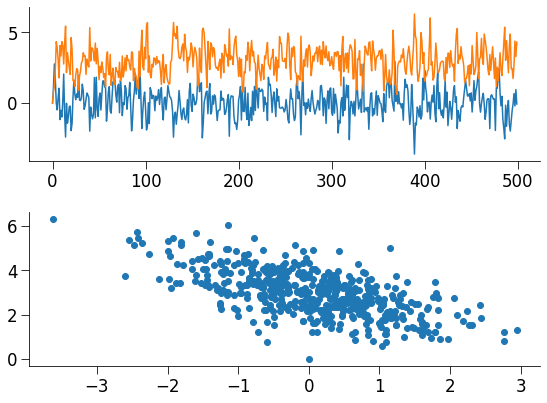

In [20]:
times,rates1,rates2 = twodimensional_UL(0.,1.,3.,1.,-0.6,1.0,500.0)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(times,rates1)
ax1.plot(times,rates2)
ax2.scatter(rates1,rates2)

In [21]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

def f(x):
    return x
interact(f,x=10)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [22]:
cov_mat = np.array([[ 1.0 , 0.5],[0.5,1.0]])
mean = np.array([2.,2.0])
times,rates = ornstein_uhlenbeck(mean,cov_mat,1.0,50.0)



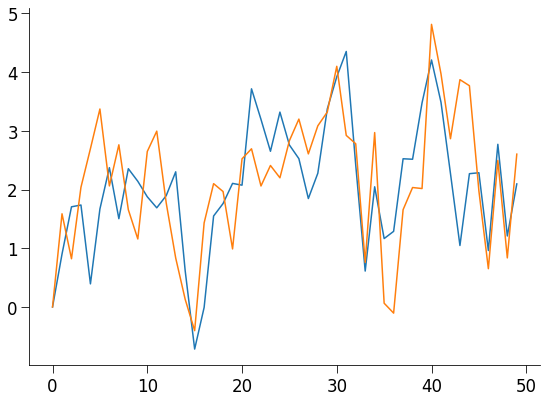

In [23]:
plt.plot(times,rates[0,:],times,rates[1,:]);

In [24]:
np.var(rates[1,:])

1.3590601034223102

In [25]:
times[-1]

49.0

In [26]:
print(np.mean(rates[0,:]), np.var(rates[0,:]))

2.0504468733242414 1.1490918849590508


In [27]:
rates

array([[ 0.        ,  0.90039506,  1.70597664,  1.73650502,  0.39318716,
         1.66877844,  2.37296113,  1.50353866,  2.3551676 ,  2.14058952,
         1.87696422,  1.68896316,  1.89653555,  2.30231868,  0.61697473,
        -0.71757296, -0.00817817,  1.54946233,  1.76208737,  2.10477177,
         2.07469835,  3.71624441,  3.19582325,  2.6519746 ,  3.31955652,
         2.75911239,  2.52630412,  1.84686765,  2.27813022,  3.37400283,
         3.92047038,  4.35251072,  2.41926463,  0.61136744,  2.04715814,
         1.16500456,  1.28783522,  2.52456659,  2.51635277,  3.47665554,
         4.2079314 ,  3.48735409,  2.27354251,  1.04693159,  2.27031062,
         2.28618665,  0.96122011,  2.7708573 ,  1.20886584,  2.09581732],
       [ 0.        ,  1.58721058,  0.82088254,  2.03922783,  2.69721651,
         3.37227557,  2.06167827,  2.76228934,  1.65598457,  1.15809666,
         2.64820211,  2.99513168,  1.76993606,  0.83338366,  0.13022384,
        -0.4041419 ,  1.43182336,  2.10072268,  1.

In [28]:
rates

array([[ 0.        ,  0.90039506,  1.70597664,  1.73650502,  0.39318716,
         1.66877844,  2.37296113,  1.50353866,  2.3551676 ,  2.14058952,
         1.87696422,  1.68896316,  1.89653555,  2.30231868,  0.61697473,
        -0.71757296, -0.00817817,  1.54946233,  1.76208737,  2.10477177,
         2.07469835,  3.71624441,  3.19582325,  2.6519746 ,  3.31955652,
         2.75911239,  2.52630412,  1.84686765,  2.27813022,  3.37400283,
         3.92047038,  4.35251072,  2.41926463,  0.61136744,  2.04715814,
         1.16500456,  1.28783522,  2.52456659,  2.51635277,  3.47665554,
         4.2079314 ,  3.48735409,  2.27354251,  1.04693159,  2.27031062,
         2.28618665,  0.96122011,  2.7708573 ,  1.20886584,  2.09581732],
       [ 0.        ,  1.58721058,  0.82088254,  2.03922783,  2.69721651,
         3.37227557,  2.06167827,  2.76228934,  1.65598457,  1.15809666,
         2.64820211,  2.99513168,  1.76993606,  0.83338366,  0.13022384,
        -0.4041419 ,  1.43182336,  2.10072268,  1.

In [29]:
vals = rng.standard_normal(10)
vals

array([-1.85485045,  0.65189558,  0.71847981, -0.74320546, -1.39024342,
        0.3030408 , -0.58916466,  0.47980811, -0.53632372, -0.22200676])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=074c8271-80e9-4d9f-94a8-13db082db696' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>